In [14]:
import os

In [ ]:
import glob

In [31]:
all_names = glob.glob('po_logs/po_gate_mindel3*')
for an in all_names:
    os.rename(an,'po_logs/po_gate_mindel3_' + an.split('mindel3')[1])

In [32]:
import glob
all_names = glob.glob('po_logs/po_gate_mindel1*')
import pickle
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [33]:
all_names

['po_logs/po_gate_mindel1_23.sh',
 'po_logs/po_gate_mindel1_400_std10_delta0.02.pickle',
 'po_logs/po_gate_mindel1_',
 'po_logs/po_gate_mindel1_600_std10_delta0.02.pickle',
 'po_logs/po_gate_mindel1_700_std10_delta0.02.pickle',
 'po_logs/po_gate_mindel1_800_std10_delta0.02.pickle',
 'po_logs/po_gate_mindel1_900_std10_delta0.02.pickle',
 'po_logs/po_gate_mindel1_1000_std10_delta0.02.pickle',
 'po_logs/po_gate_mindel1_1100_std10_delta0.02.pickle',
 'po_logs/po_gate_mindel1_100_std10_delta0.02.pickle',
 'po_logs/po_gate_mindel1_200_std10_delta0.02.pickle',
 'po_logs/po_gate_mindel1_300_std10_delta0.02.pickle',
 'po_logs/po_gate_mindel1_500_std10_delta0.02.pickle',
 'po_logs/po_gate_mindel1_.py',
 'po_logs/po_gate_mindel1_1200_std10_delta0.02.pickle',
 'po_logs/po_gate_mindel1_1249_std10_delta0.02.pickle']

In [34]:
records['mindel'] = []

# baselineのグラフを書く

In [3]:
records = {'baseline':[],'forwards':[],'gated':[]}

In [35]:
for i in range(3):
    all_names = glob.glob('po_logs/po_gate_mindel'+str(i+1)+'_*.pickle')
    data = {"qt+i_r":[],
           'reward':[],
           "loss":[],
           "loss_a":[]}
    for j,an in enumerate(all_names):
        print(j,len(all_names))
        with open(an,mode='rb') as f:
            tmp = pickle.load(f)
            data['reward'] += [d for i, d in enumerate(tmp['reward'])]
    records['mindel'].append(data['reward'])
records['mindel'] = np.array(records['mindel'])

0 13
1 13
2 13
3 13
4 13
5 13
6 13
7 13
8 13
9 13
10 13
11 13
12 13
0 13
1 13
2 13
3 13
4 13
5 13
6 13
7 13
8 13
9 13
10 13
11 13
12 13
0 13
1 13
2 13
3 13
4 13
5 13
6 13
7 13
8 13
9 13
10 13
11 13
12 13


In [37]:
mean = {}
std_up = {}
std_down = {}
records_mean = {}

In [38]:
for k in records.keys():
    records_mean[k] = np.array([[sum(rews[i:i+20])/20 for i in range(len(rews)-20)] for rews in records[k]])
    mean[k] = records_mean[k].T.mean(axis=1)
    mean[k] = mean[k]
    std_up[k] = records_mean[k].T.mean(axis=1)+records_mean[k].T.std(axis=1)
    std_up[k] = std_up[k]
    std_down[k] = records_mean[k].T.mean(axis=1)-records_mean[k].T.std(axis=1)
    std_down[k] = std_down[k]

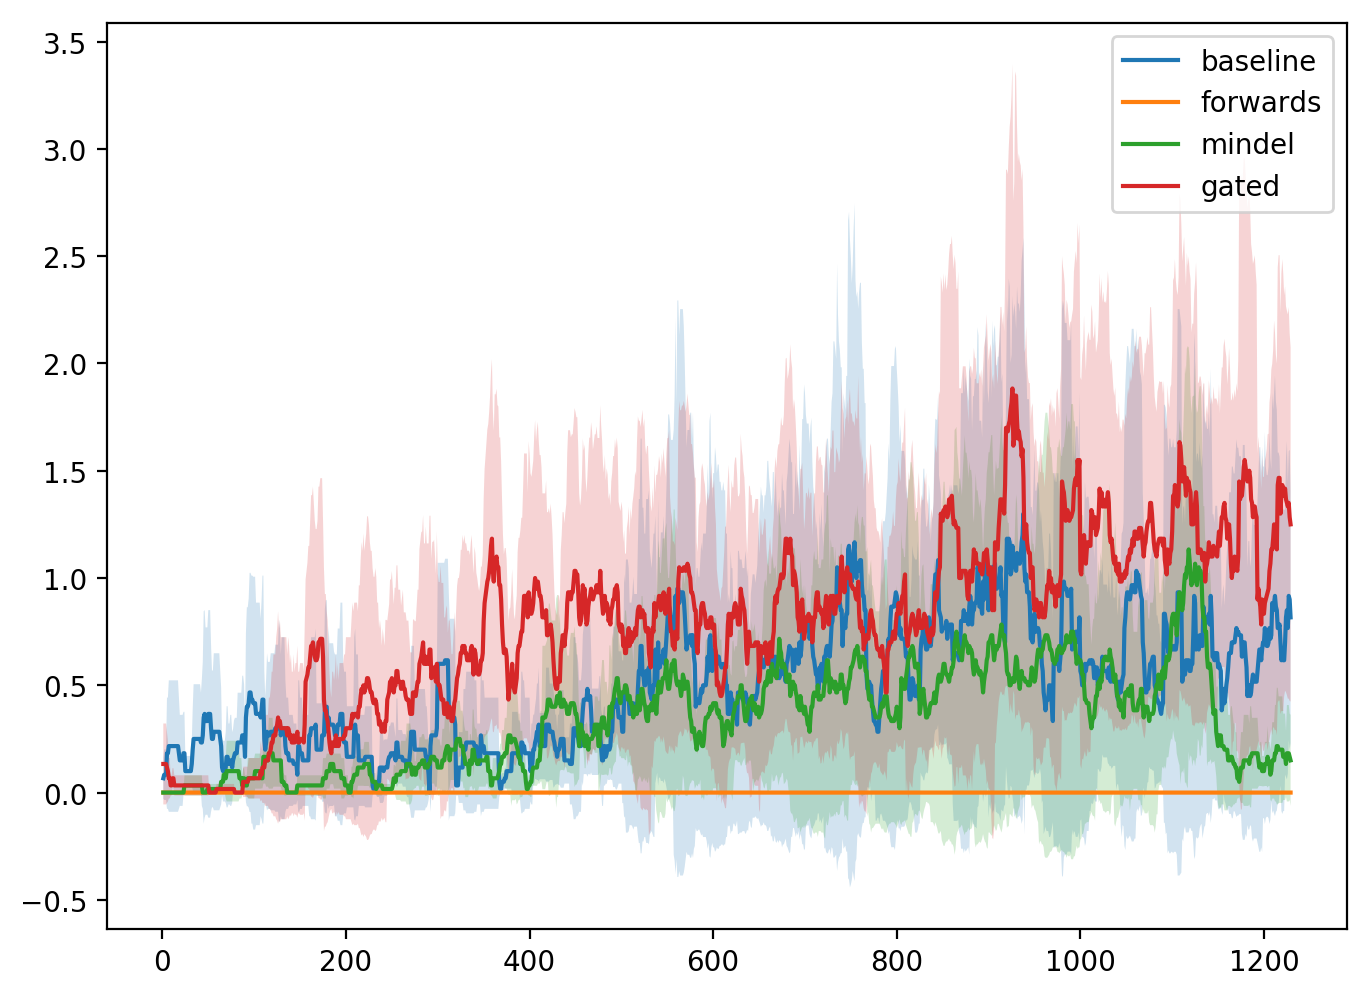

In [40]:
plt.figure(figsize=(8,6),dpi=200)
for lab,k in zip(records.keys(),records.keys()):
    plt.fill_between([i+1 for i in range(len(mean[k]))], std_up[k], std_down[k],alpha=0.2)
    plt.plot([i+1 for i in range(len(mean[k]))],mean[k],label=lab)
plt.legend()